In [174]:
# To check if GPU is active
from tensorflow.python.client import device_lib

# Load Data
import os
import cv2
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt

# Model Training
import tensorflow as tf



from tensorflow.keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

In [175]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15690361102834871983
]


In [176]:
train_dir = 'ArASL_Database_54K_train'
test_dir = 'ArASL_test'

In [177]:
def get_data(data_dir) :
    images = []
    labels = []
    
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Obtaining images of", dir_list[i], "...")
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(i)
    
    return images, labels
        
X, y = get_data(train_dir)

Obtaining images of ain ...
Obtaining images of al ...
Obtaining images of aleff ...
Obtaining images of bb ...
Obtaining images of dal ...
Obtaining images of dha ...
Obtaining images of dhad ...


KeyboardInterrupt: 

In [151]:


print(len(X), len(y))



54018 54018


In [152]:
classes = ['ain','al', 'aleff', 'bb', 'dal', 'dha', 'dhad', 'fa', 'gaaf', 'ghain', 'ha', 'haa', 'jeem', 
           'kaaf', 'khaa', 'la', 'laam', 'meem', 'nun', 'ra', 'saad', 'seen', 'sheen', 'ta', 'taa',
           'thaa', 'thal', 'toot', 'waw', 'ya', 'yaa', 'zay']

x = len(classes) 
print(x)

32


<Figure size 640x480 with 0 Axes>

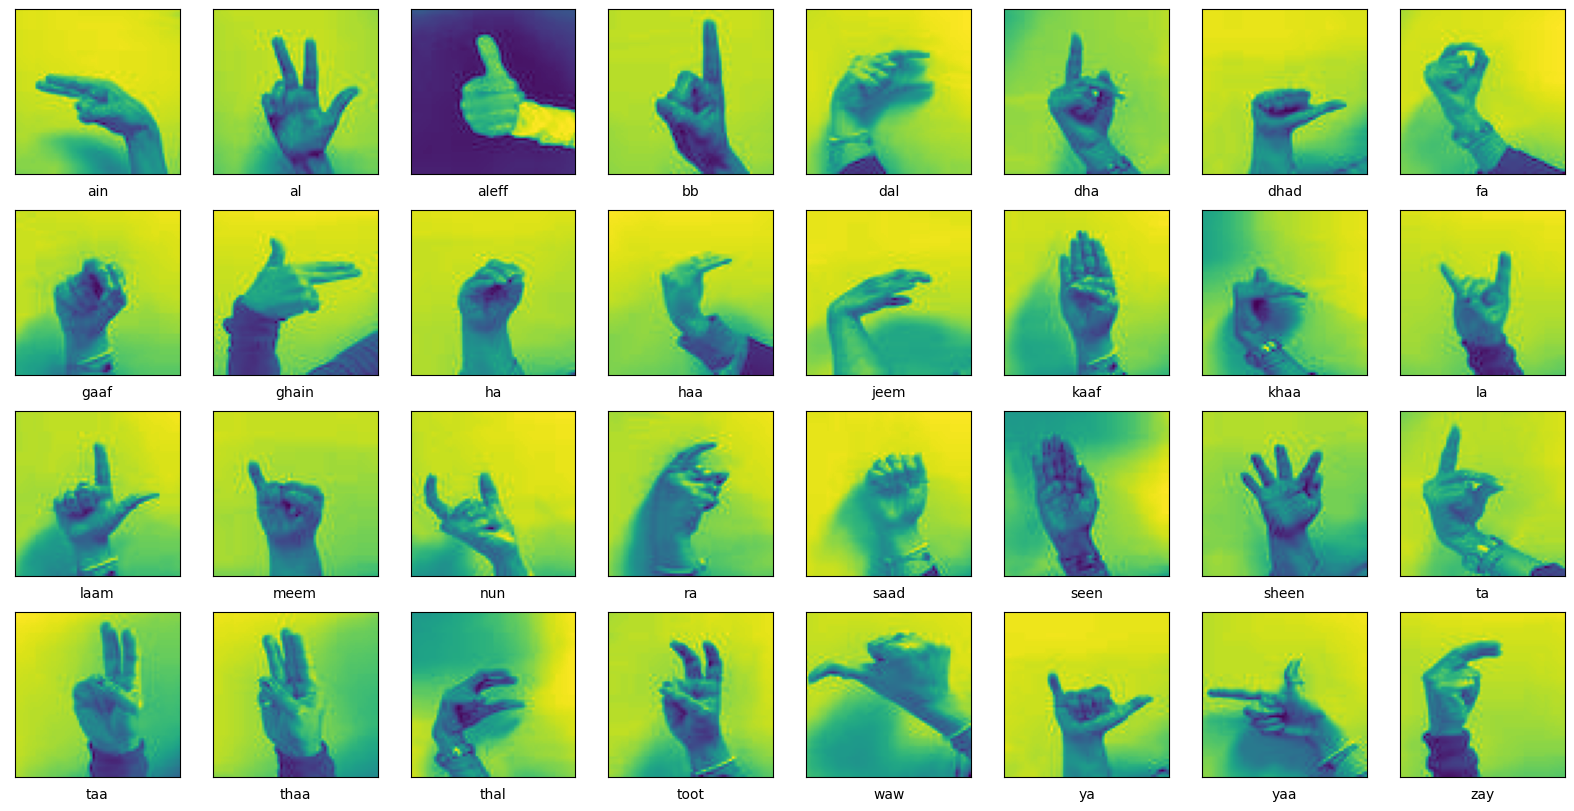

In [158]:
def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(20,10))

    for i in range (0,32):
        plt.subplot(4,8,i+1)
        plt.xticks([])
        plt.yticks([])
        path = train_dir + "/{0}/{0} (1).jpg".format(classes[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])
        
plot_sample_images()

In [159]:
def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32')/255.0
    
    label_encoded_y = utils.to_categorical(y)
    
    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.1)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

In [160]:
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (48616, 32, 32, 3)
Test data: (5402, 32, 32, 3)


In [161]:
classes = 32
batch = 32
epochs = 15
learning_rate = 0.001

In [162]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(classes, activation='softmax'))

In [166]:


adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])



In [168]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 8, 8, 128)         512       
_________________________________________________________________
dropout_14 (Dropout)         (None, 8, 8, 128)        

In [169]:
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=1)

Epoch 1/15
1216/1216 [==============================] - 122s 100ms/step - loss: 0.7864 - accuracy: 0.7836 - val_loss: 2.9192 - val_accuracy: 0.4784
Epoch 2/15
1216/1216 [==============================] - 132s 108ms/step - loss: 0.2217 - accuracy: 0.9393 - val_loss: 0.7856 - val_accuracy: 0.7788
Epoch 3/15
1216/1216 [==============================] - 132s 108ms/step - loss: 0.1533 - accuracy: 0.9574 - val_loss: 1.0126 - val_accuracy: 0.8032
Epoch 4/15
1216/1216 [==============================] - 128s 105ms/step - loss: 0.1378 - accuracy: 0.9629 - val_loss: 0.5490 - val_accuracy: 0.8890
Epoch 5/15
1216/1216 [==============================] - 133s 109ms/step - loss: 0.1032 - accuracy: 0.9725 - val_loss: 0.2024 - val_accuracy: 0.9544
Epoch 6/15
1216/1216 [==============================] - 131s 108ms/step - loss: 0.1033 - accuracy: 0.9728 - val_loss: 0.2843 - val_accuracy: 0.9372
Epoch 7/15
1216/1216 [==============================] - 130s 107ms/step - loss: 0.0731 - accuracy: 0.9808 - val_

In [170]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

169/169 [==============================] - 3s 18ms/step - loss: 0.2621 - accuracy: 0.9571
Test accuracy: 0.9570529460906982
Test loss: 0.2621074914932251


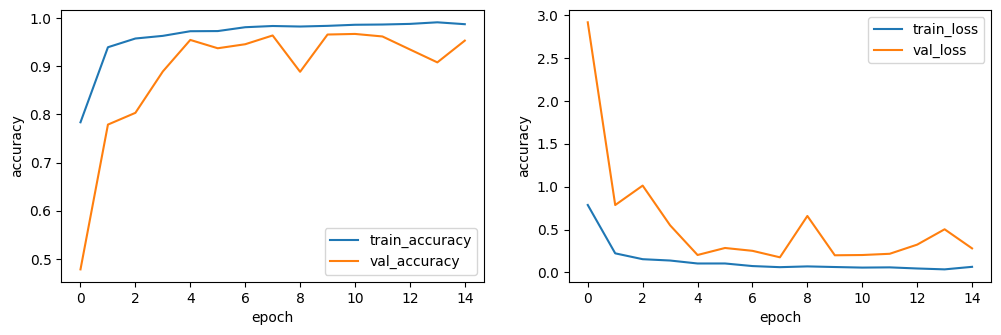

In [171]:
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()


    
plot_results(model)

In [172]:
model.save('signs.h5')
print("Saving the model as signs.h5")

Saving the model as signs.h5


In [178]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_dir, target_size=(64,64), class_mode='categorical', batch_size=10,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_dir, target_size=(64,64), class_mode='categorical', batch_size=10, shuffle=True)

Found 54018 images belonging to 32 classes.
Found 0 images belonging to 0 classes.


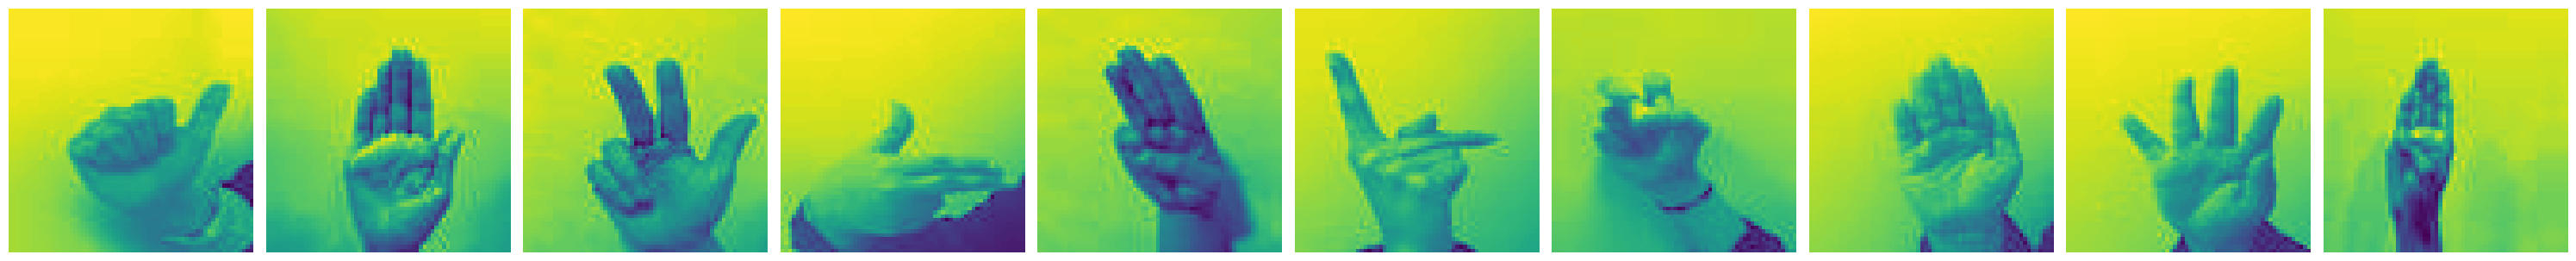

(10, 64, 64, 3)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 

In [185]:
imgs, labels = next(train_batches)
#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(imgs.shape)
print(labels)

In [191]:


history2 = model.fit(train_batches, epochs=10, callbacks=None,  validation_data = test_batches)

Epoch 1/10


InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[40,32] labels_size=[10,32]
	 [[node categorical_crossentropy/softmax_cross_entropy_with_logits (defined at \AppData\Local\Temp\ipykernel_15388\661200519.py:1) ]] [Op:__inference_train_function_128963]

Function call stack:
train_function


In [ ]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
   
    while cap.isOpened():
        ret, frame = cap.read()
       
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False      # unchangeable(locked)    
       
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)

        # Make Image and Blank Black image due to privacy concerns
        image = np.zeros((frame.shape[0],frame.shape[1],3), np.uint8)

        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )

        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
           
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
           
            # Concate rows
            row = pose_row+face_row

            # Make Detections
            X = pd.DataFrame([row])    #.  
            body_language_class = loaded_model.predict(X)[0]
            body_language_prob = loaded_model.predict_proba(X)[0]
            print(body_language_class, body_language_prob)
           
            # Grab ear coords
            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x,
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                         , [640,480]).astype(int))
           
            cv2.rectangle(image,
                          (coords[0], coords[1]+5),
                          (coords[0]+len(body_language_class)*20, coords[1]-30),
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class, coords,
                         cv2.FONT_HERSHEY_DUPLEX, 1, (20, 50, 255), 2, cv2.LINE_AA)
           
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (255, 0, 0), -1)
           
           
            # Display Probability text
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            # Display Class text
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
           
           
            #probability value
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
           
            #display class name
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
           
           
           
           
         
           
        except:
            pass
                       
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

